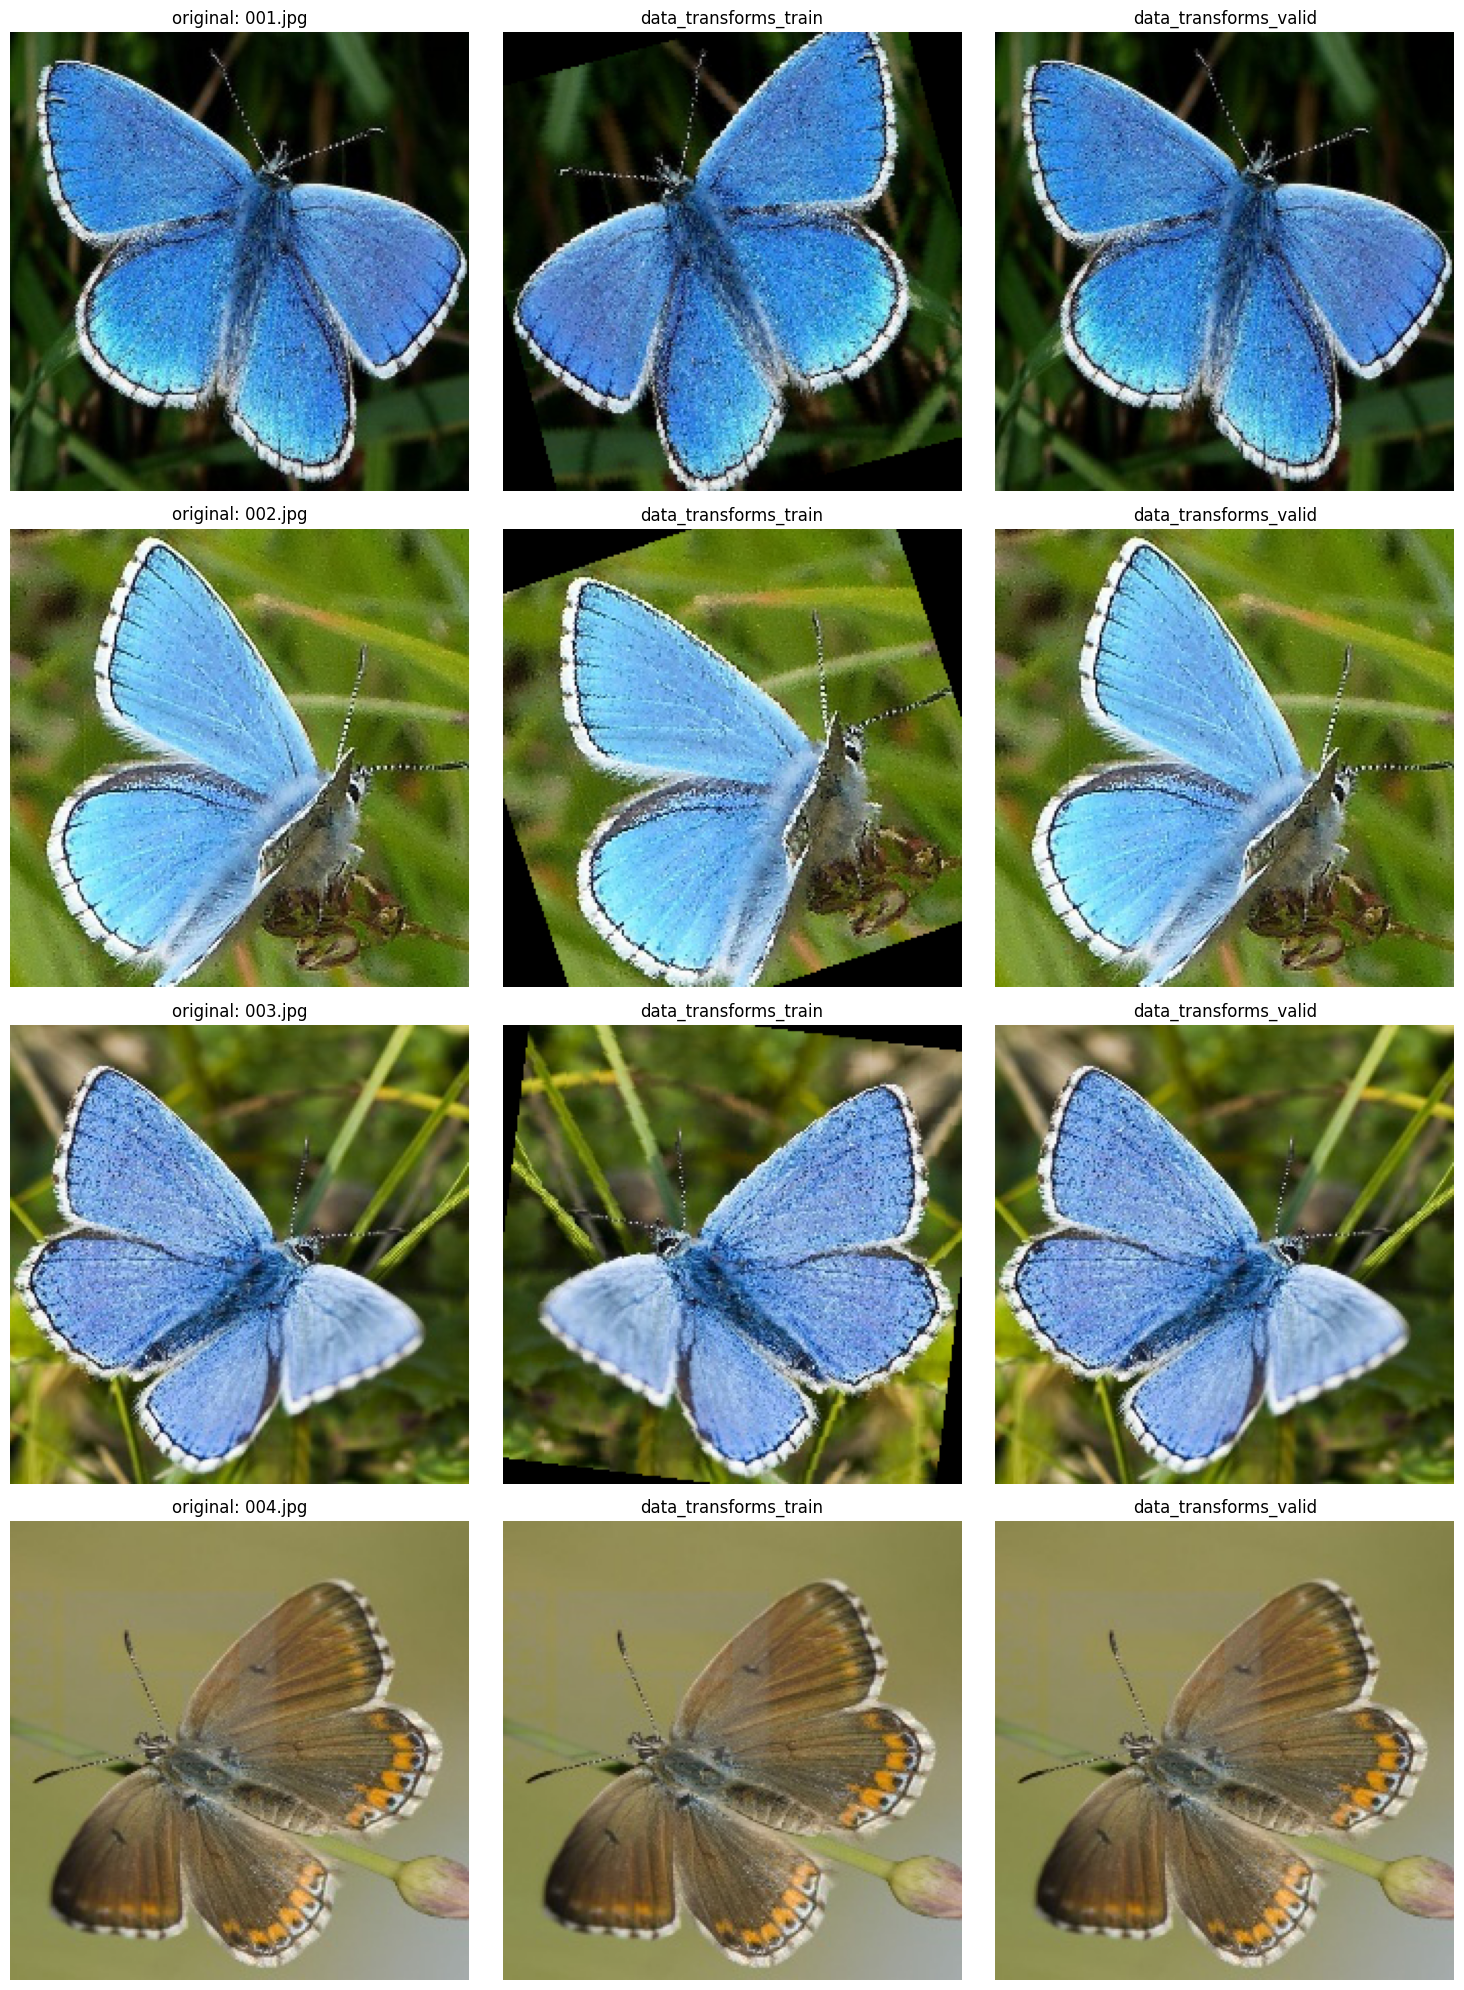

In [8]:
# 导入必要的库
import os
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
import torchvision.transforms.functional as TF

# 定义图像转换
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),  # 随机水平翻转
        transforms.RandomRotation(20),      # 随机旋转20度
        transforms.Resize((224, 224)),       # 调整大小到224x224
        transforms.ToTensor(),               # 转换为张量
        transforms.Normalize([0.485, 0.456, 0.406],  # 归一化
                             [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize((224, 224)),       # 调整大小到224x224
        transforms.ToTensor(),               # 转换为张量
        transforms.Normalize([0.485, 0.456, 0.406],  # 归一化
                             [0.229, 0.224, 0.225])
    ]),
}

# 定义一个函数来反归一化图像，用于显示
def unnormalize(tensor, mean, std):
    """
    反归一化张量
    Args:
        tensor (Tensor): 归一化后的张量
        mean (list): 均值
        std (list): 标准差
    Returns:
        Tensor: 反归一化后的张量
    """
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

# 设置图片文件夹路径
original_img_dir = 'images/test_images_train'  # 原始图片文件夹

# 获取原始图片文件夹中的所有图片文件
img_files = [f for f in os.listdir(original_img_dir) 
            if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# 选择前几张图片进行处理和展示（例如前4张）
num_images = min(4, len(img_files))
selected_imgs = img_files[:num_images]

# 设置绘图的行数和列数（每张图片3列：原始、data_transforms_train处理、data_transforms_test处理）
fig, axes = plt.subplots(num_images, 3, figsize=(15, 5 * num_images))
if num_images == 1:
    axes = [axes]  # 确保axes是列表

for idx, img_name in enumerate(selected_imgs):
    img_path = os.path.join(original_img_dir, img_name)
    img = Image.open(img_path).convert('RGB')  # 打开并转换为RGB

    # 显示原始图像
    axes[idx][0].imshow(img)
    axes[idx][0].set_title(f'original: {img_name}')
    axes[idx][0].axis('off')

    # 使用data_transforms['train']进行处理
    transformed_tensor = data_transforms['train'](img)
    # 反归一化以便显示
    unnorm_tensor = unnormalize(transformed_tensor.clone(),
                                 mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    # 转换为numpy数组并限制范围在[0,1]
    unnorm_img = TF.to_pil_image(torch.clamp(unnorm_tensor, 0, 1))
    # 显示data_transforms处理后的图像
    axes[idx][1].imshow(unnorm_img)
    axes[idx][1].set_title('data_transforms_train')
    axes[idx][1].axis('off')
    
    # 使用data_transforms['valid']进行处理
    transformed_tensor_valid = data_transforms['valid'](img)
    # 反归一化以便显示
    unnorm_tensor_valid = unnormalize(transformed_tensor_valid.clone(),
                                 mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    # 转换为numpy数组并限制范围在[0,1]
    unnorm_img_valid = TF.to_pil_image(torch.clamp(unnorm_tensor_valid, 0, 1))
    # 显示data_transforms处理后的图像
    axes[idx][2].imshow(unnorm_img_valid)
    axes[idx][2].set_title('data_transforms_valid')
    axes[idx][2].axis('off')

plt.tight_layout()
plt.show()